## 📊 Многомерный ABC-анализ продаж офисных товаров (Sample Superstore)

### 1. Введение

В этом проекте проведён многомерный ABC-анализ по количеству и сумме продаж товаров из датасета Sample Superstore (США).  
Цель — выявить ключевые товары, которые приносят наибольший вклад в продажи, и визуализировать результаты  
для принятия управленческих решений.

### 2. Импорт библиотек и загрузка данных

In [161]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
# Загрузка данных
df = pd.read_csv('Superstore_Orders.csv', sep=';')
df.head(3)

,Category,City,Country/Region,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State/Province,Sub-Category,Discount,Profit,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,03.01.2019,US-2019-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,07.01.2019,Standard Class,Texas,Paper,0.200,5.551,2,16.448
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,04.01.2019,US-2019-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,08.01.2019,Standard Class,Illinois,Binders,0.800,-5.487,2,3.540
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,04.01.2019,US-2019-112326,60540,Avery 508,Central,Home Office,08.01.2019,Standard Class,Illinois,Labels,0.200,4.272,3,11.784


In [5]:
# Приведём колонки к удобнову виду
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head(1)

,category,city,country/region,customer_name,manufacturer,order_date,order_id,postal_code,product_name,region,segment,ship_date,ship_mode,state/province,sub-category,discount,profit,quantity,sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,03.01.2019,US-2019-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,07.01.2019,Standard Class,Texas,Paper,0.200,5.551,2,16.448


### 3.Предобработка данных

**Проверим данные на пропуски и дубликаты, а также убедимся, что типы данных корректны.**

In [422]:
# Подробный отчет по пропускам
def color(val):
    if val > 0.001:
        color = 'red'
    else:
        color = 'green'
    return 'color: %s' % color

df_null = (
    df.isna().sum()
    .to_frame('Пропуски, шт')
    .assign(**{'Пропуски, %': lambda x: x['Пропуски, шт'] / len(df)})
)
df_null.style \
    .format({'Пропуски, %':'{:.2%}'}, thousands=' ') \
    .map(color, subset='Пропуски, %')

,"Пропуски, шт","Пропуски, %"
category,0,0.00%
city,0,0.00%
country/region,0,0.00%
customer_name,0,0.00%
manufacturer,0,0.00%
order_date,0,0.00%
order_id,0,0.00%
postal_code,0,0.00%
product_name,0,0.00%
region,0,0.00%


**Удалим пропуски, так как эти признаки критичны для дальнейшего анализа**

In [9]:
df.dropna(inplace=True)

In [11]:
# Проверка
print("Количество пропусков в 'quantity':", df['quantity'].isna().sum())
print("Количество пропусков в 'sales':", df['sales'].isna().sum())

Количество пропусков в 'quantity': 0
Количество пропусков в 'sales': 0


In [13]:
df.duplicated().sum()

2

In [15]:
df[df.duplicated(keep=False)]

,category,city,country/region,customer_name,manufacturer,order_date,order_id,postal_code,product_name,region,segment,ship_date,ship_mode,state/province,sub-category,discount,profit,quantity,sales
390,Furniture,Columbus,United States,Laurel Beltran,Global,23.04.2019,US-2019-150119,43229,Global Leather Highback Executive Chair with P...,East,Home Office,27.04.2019,Standard Class,Ohio,Chairs,0.300,-12.059,2,281.372
391,Furniture,Columbus,United States,Laurel Beltran,Global,23.04.2019,US-2019-150119,43229,Global Leather Highback Executive Chair with P...,East,Home Office,27.04.2019,Standard Class,Ohio,Chairs,0.300,-12.059,2,281.372
1698,Furniture,St. John's,Canada,James Peterman,Nu-Dell,24.11.2019,CA-2019-153623,A0A,Nu-Dell Executive Frame,East,Corporate,05.12.2019,Standard Class,Newfoundland and Labrador,Furnishings,0.000,35.414,8,99.120
1699,Furniture,St. John's,Canada,James Peterman,Nu-Dell,24.11.2019,CA-2019-153623,A0A,Nu-Dell Executive Frame,East,Corporate,05.12.2019,Standard Class,Newfoundland and Labrador,Furnishings,0.000,35.414,8,99.120


In [17]:
# Удаление дубликатов
df = df.drop_duplicates()

In [19]:
# Проверка
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10192 entries, 0 to 10193
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        10192 non-null  object 
 1   city            10192 non-null  object 
 2   country/region  10192 non-null  object 
 3   customer_name   10192 non-null  object 
 4   manufacturer    10192 non-null  object 
 5   order_date      10192 non-null  object 
 6   order_id        10192 non-null  object 
 7   postal_code     10192 non-null  object 
 8   product_name    10192 non-null  object 
 9   region          10192 non-null  object 
 10  segment         10192 non-null  object 
 11  ship_date       10192 non-null  object 
 12  ship_mode       10192 non-null  object 
 13  state/province  10192 non-null  object 
 14  sub-category    10192 non-null  object 
 15  discount        10192 non-null  float64
 16  profit          10192 non-null  float64
 17  quantity        10192 non-null  int6

### 4. Группировка по товарам

**Сгруппируем данные по товарам, посчитаем общее количество и сумму продаж для каждого товара.**

In [23]:
groupped_df = (
    df.groupby('product_name', as_index=False)
      .agg(total_quantity=('quantity', 'sum'),
           total_sum=('sales', 'sum'))
)

In [25]:
groupped_df

,product_name,total_quantity,total_sum
0,"""While you Were Out"" Message Book, One Form pe...",8,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",11,41.300
2,#10 Self-Seal White Envelopes,10,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32,488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37,286.672
...,...,...,...
1844,iKross Bluetooth Portable Keyboard + Cell Phon...,64,1315.660
1845,iOttie HLCRIO102 Car Mount,12,215.892
1846,iOttie XL Car Mount,14,223.888
1847,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,29,442.554


### 5. ABC-анализ по количеству

**Проведём ABC-анализ по количеству проданных товаров**
- Группа A: 80% продаж
- Группа B: 15% продаж
- Группа C: 5% продаж

**Пороговые значения для ABC-анализа**
  
Пороговые значения (`0.8`, `0.95`) — это общепринятые, но иногда их подбирают под задачу, они могут быть изменены.

In [27]:
a_threshold = 0.8
b_threshold = 0.95

Далее последовательно выполняем следующие действия:
- Посчитать долю каждого товара от общего количества.
- Отсортировать датафрейм по убыванию вклада.
- Посчитать накопительную сумму.
- Присвоить группы A/B/C по стандартным порогам (80/15/5) — это классика.

**Считаем вклад каждого товара от общего количества продаж**

In [29]:
groupped_df['perc_total_quantity'] = (groupped_df['total_quantity'] / sum(groupped_df['total_quantity']))

**Сортируем датафрейм от большей доли вклада к меньшей**

In [31]:
groupped_df = groupped_df.sort_values(by='perc_total_quantity', ascending=False).reset_index(drop=True)

**Считаем сумму накопительным итогом по столбцу perc_total_quantity**

In [33]:
groupped_df['cum_sum_quantity'] = groupped_df['perc_total_quantity'].cumsum()

**Присваивем группы A/B/C по заданным порогам (80/15/5)**

In [35]:
groupped_df['abc_quantity']=np.where(groupped_df['cum_sum_quantity'] < a_threshold, 'A', 
                            np.where(groupped_df['cum_sum_quantity'] < b_threshold, 'B', 'C'))

In [37]:
groupped_df

,product_name,total_quantity,total_sum,perc_total_quantity,cum_sum_quantity,abc_quantity
0,Staples,234,6014.730,0.006,0.006,A
1,Staple envelope,170,1686.812,0.004,0.010,A
2,Easy-staple paper,150,2504.192,0.004,0.014,A
3,Staples in misc. colors,86,478.812,0.002,0.017,A
4,KI Adjustable-Height Table,79,4820.951,0.002,0.019,A
...,...,...,...,...,...,...
1844,Global Enterprise Series Seating Low-Back Swiv...,1,207.184,0.000,1.000,C
1845,Boston 1900 Electric Pencil Sharpener,1,14.980,0.000,1.000,C
1846,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1,119.833,0.000,1.000,C
1847,Xerox 20,1,6.480,0.000,1.000,C


### 6. ABC-анализ по сумме

**Аналогично проведём ABC-анализ по сумме продаж.**

In [39]:
groupped_df['perc_total_sum'] = (groupped_df['total_sum'] / sum(groupped_df['total_sum']))

In [41]:
groupped_df = groupped_df.sort_values(by='perc_total_sum', ascending=False)

In [43]:
groupped_df['cum_sum_total_sum'] = groupped_df['perc_total_sum'].cumsum()

In [45]:
groupped_df['abc_sum']=np.where(groupped_df['cum_sum_total_sum'] < a_threshold, 'A', 
                       np.where(groupped_df['cum_sum_total_sum'] < b_threshold, 'B', 'C'))

In [49]:
groupped_df

,product_name,total_quantity,total_sum,perc_total_quantity,cum_sum_quantity,abc_quantity,perc_total_sum,cum_sum_total_sum,abc_sum
854,Canon imageCLASS 2200 Advanced Copier,20,61599.824,0.001,0.688,A,0.026,0.026,A
317,Fellowes PB500 Electric Punch Plastic Comb Bin...,31,27453.384,0.001,0.342,A,0.012,0.038,A
1681,Cisco TelePresence System EX90 Videoconferenci...,6,22638.480,0.000,0.982,C,0.010,0.048,A
145,HON 5400 Series Task Chairs for Big and Tall,39,21870.576,0.001,0.189,A,0.009,0.057,A
177,GBC DocuBind TL300 Electric Binding System,37,19823.479,0.001,0.220,A,0.009,0.066,A
...,...,...,...,...,...,...,...,...,...
1839,Avery Hi-Liter Pen Style Six-Color Fluorescent...,2,7.700,0.000,1.000,C,0.000,1.000,C
1829,Grip Seal Envelopes,2,7.072,0.000,0.999,C,0.000,1.000,C
1847,Xerox 20,1,6.480,0.000,1.000,C,0.000,1.000,C
1827,Avery 5,2,5.760,0.000,0.999,C,0.000,1.000,C


### 7. Комбинированная категория

**Создаю столбец `abc_combo` - это позволит быстро находить, например, товары "AA", "AB", "BC" и т.д.**

In [51]:
groupped_df['abc_combo'] = groupped_df['abc_quantity'] + groupped_df['abc_sum']

### 8. Финальный датасет

**Оставляю только нужные столбцы**

In [53]:
result = groupped_df[['product_name', 'total_quantity', 'total_sum', 'abc_quantity', 'abc_sum', 'abc_combo']].copy()

In [55]:
result = result.reset_index(drop=True)

In [57]:
result[['total_quantity', 'total_sum']] = result[['total_quantity', 'total_sum']].astype('int')

In [59]:
result

,product_name,total_quantity,total_sum,abc_quantity,abc_sum,abc_combo
0,Canon imageCLASS 2200 Advanced Copier,20,61599,A,A,AA
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,31,27453,A,A,AA
2,Cisco TelePresence System EX90 Videoconferenci...,6,22638,C,A,CA
3,HON 5400 Series Task Chairs for Big and Tall,39,21870,A,A,AA
4,GBC DocuBind TL300 Electric Binding System,37,19823,A,A,AA
...,...,...,...,...,...,...
1844,Avery Hi-Liter Pen Style Six-Color Fluorescent...,2,7,C,C,CC
1845,Grip Seal Envelopes,2,7,C,C,CC
1846,Xerox 20,1,6,C,C,CC
1847,Avery 5,2,5,C,C,CC


## 9. Визуализация результатов 📉

#### Интерактивный barplot: Топ-10 товаров из группы "A" по сумме продаж

**На графике показаны 10 товаров из группы "A" по сумме продаж — это самые ценные товары для бизнеса.**

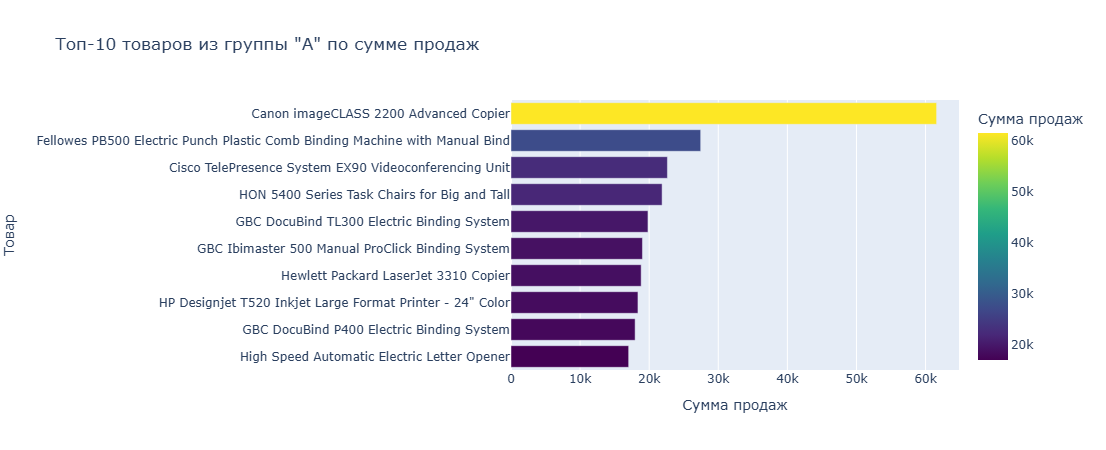

In [145]:
top_a = result[result['abc_sum'] == 'A'].sort_values(by='total_sum', ascending=False).head(10)
fig = px.bar(
    top_a, 
    x='total_sum', 
    y='product_name', 
    orientation='h',
    title='Топ-10 товаров из группы "A" по сумме продаж',
    labels={'total_sum': 'Сумма продаж', 'product_name': 'Товар'},
    color='total_sum', color_continuous_scale='Viridis',
    height=450
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

#### Распределение товаров по группам ABC по количеству и сумме

**На графике показано, сколько товаров попало в каждую из групп ABC по количеству и сумме продаж.**

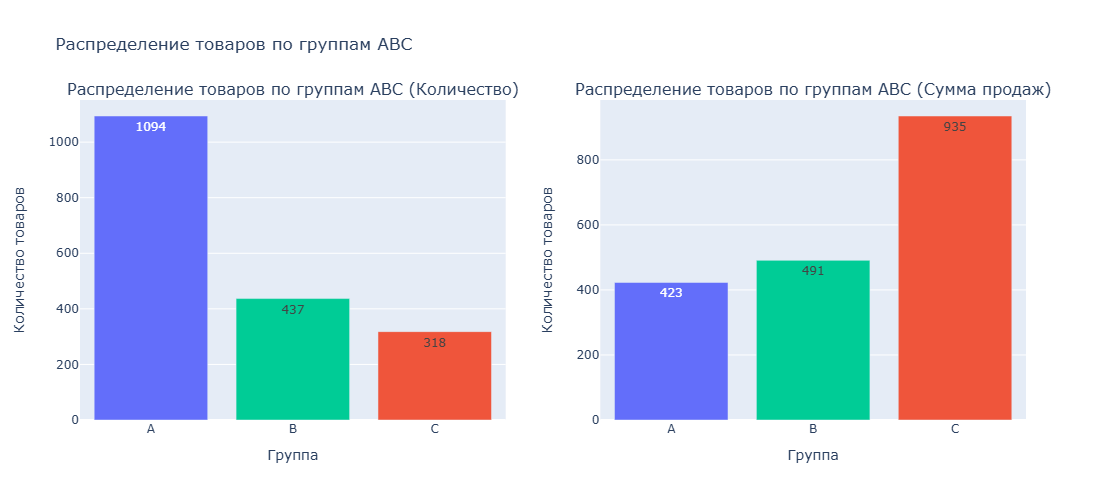

In [163]:
# Подсчёт количества товаров в каждой группе
quantity_counts = result['abc_quantity'].value_counts().reindex(['A', 'B', 'C'], fill_value=0)
sum_counts = result['abc_sum'].value_counts().reindex(['A', 'B', 'C'], fill_value=0)

# Создаём две гистограммы в одной строке
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    "Распределение товаров по группам ABC (Количество)",
    "Распределение товаров по группам ABC (Сумма продаж)"
))

# Гистограмма по количеству
fig.add_trace(
    go.Bar(
        x=quantity_counts.index,
        y=quantity_counts.values,
        marker_color=['#636EFA', '#00CC96', '#EF553B'],  # Можно поменять цвета
        text=quantity_counts.values,
        textposition='auto',
        name='По количеству'
    ),
    row=1, col=1
)

# Гистограмма по сумме
fig.add_trace(
    go.Bar(
        x=sum_counts.index,
        y=sum_counts.values,
        marker_color=['#636EFA', '#00CC96', '#EF553B'],
        text=sum_counts.values,
        textposition='auto',
        name='По сумме'
    ),
    row=1, col=2
)

# Настройки осей и заголовков
fig.update_xaxes(title_text="Группа", row=1, col=1)
fig.update_yaxes(title_text="Количество товаров", row=1, col=1)
fig.update_xaxes(title_text="Группа", row=1, col=2)
fig.update_yaxes(title_text="Количество товаров", row=1, col=2)

fig.update_layout(
    title_text="Распределение товаров по группам ABC",
    showlegend=False,
    height=500,
    width=1100
)

fig.show()

#### Интерактивная тепловая карта: Пересечение групп ABC (Количество vs Сумма)

**На тепловой карте видно, сколько товаров попало в каждую комбинацию групп по количеству и по сумме продаж.**
- Например, "AA" — товары, которые входят в группу A и по количеству, и по сумме.

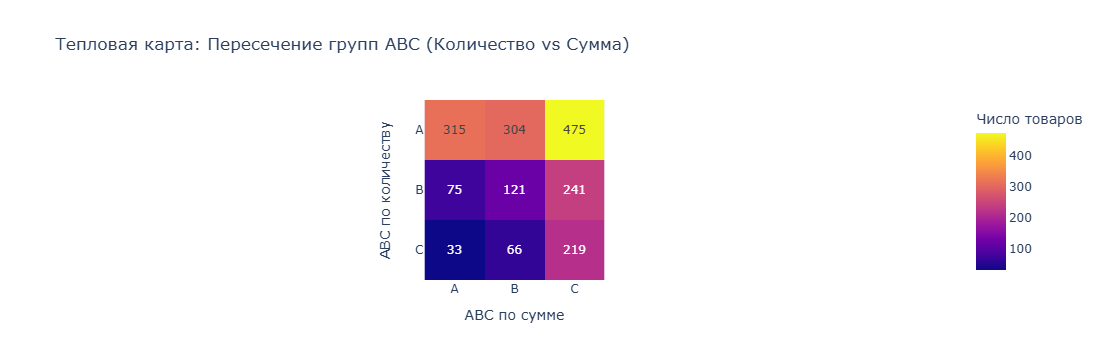

In [157]:
pivot = result.pivot_table(index='abc_quantity', columns='abc_sum', values='product_name', aggfunc='count').fillna(0)
fig = px.imshow(pivot,
                text_auto=True,
                labels=dict(x="ABC по сумме", y="ABC по количеству", color="Число товаров"),
                title="Тепловая карта: Пересечение групп ABC (Количество vs Сумма)")
fig.show()

#### 9.4. Интерактивная диаграмма: Комбинированные группы (AA, AB, AC и т.д.)

**На графике показано, сколько товаров попало в каждую из возможных комбинаций групп (например, AA, AB, BC и т.д.).**

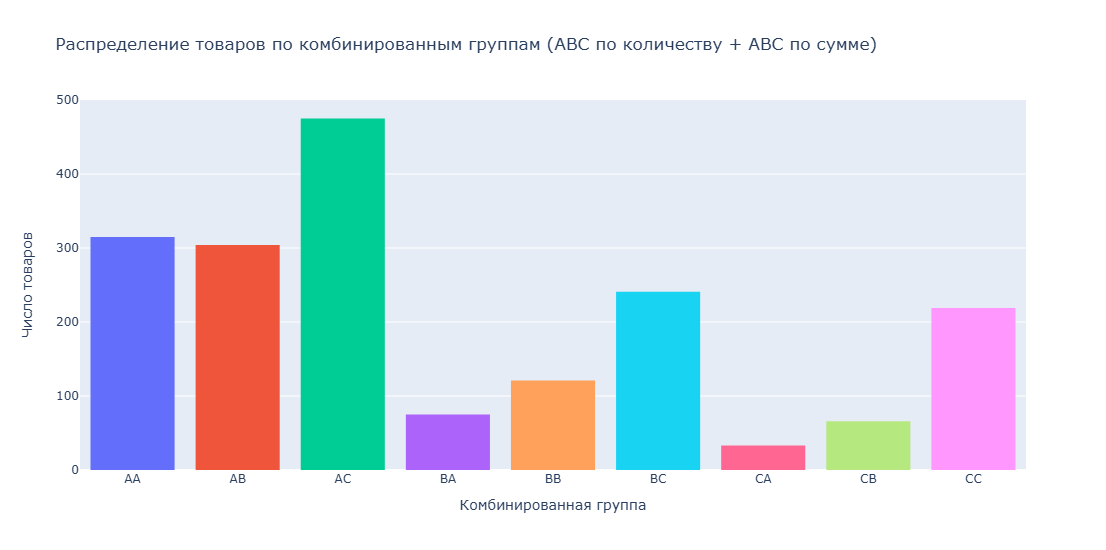

In [159]:
order = ['AA', 'AB', 'AC', 'BA', 'BB', 'BC', 'CA', 'CB', 'CC']

fig = px.histogram(
    result,
    x='abc_combo',
    color='abc_combo',
    category_orders={'abc_combo': order},
    title='Распределение товаров по комбинированным группам (ABC по количеству + ABC по сумме)',
    labels={'abc_combo': 'Комбинированная группа', 'count': 'Число товаров'},
    height=550
)
fig.update_layout(showlegend=False)
fig.update_yaxes(title_text='Число товаров')
fig.show()

## 10. Основные инсайты по результатам анализа

- **Группа "A" по сумме продаж** приносит 80% всей выручки - 28.1% проданных товаров — именно на эти товары стоит делать акцент в управлении ассортиментом и маркетинге.
- **Группа "A" по количеству** отличается по составу от группы "A" по сумме: есть товары, которые продаются часто, но приносят мало денег, и наоборот.
- **Высокомаржинальные продукты** (C по количеству, A по сумме) — это нишевые/премиальные товары, которые редко покупают, но приносят значительную выручку, необходимо регулярно проверять остатки, оптимизировать логистику для предотвращения дефицита.
- **Комбинированный анализ** (AA, AB, BA и т.д.) позволяет выявить товары, которые одновременно важны и по объёму, и по выручке, а также "скрытые резервы" — например, товары из группы AC (много продаются, но приносят мало денег).
- **Топ-10 товаров** по сумме продаж — это ключевые позиции для бизнеса, их стоит держать в наличии и поддерживать высокий уровень сервиса.
- **Визуализация пересечений** помогает быстро понять структуру ассортимента и принять решения по оптимизации запасов и продвижению.

---

**Рекомендации:**
- Сфокусироваться на товарах группы "A" по сумме для увеличения прибыли.
- Проанализировать товары из группы "B" — возможно, их можно перевести в "A" с помощью маркетинга.
- Рассмотреть возможность сокращения ассортимента группы "C" для оптимизации складских запасов.

---

*Спасибо за внимание!*

#### Контакты

**Автор:** *Александр Пресняков*  
**Telegram:** https://t.me/presnyakov85  
**GitHub:** https://github.com/DataDashInsight/-ABC--Pandas